<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Laboratorio 2
## Comunicación de resultados

Inspiración: Notas de Five thirty eight [Ejemplo](https://fivethirtyeight.com/features/the-pay-gap-is-way-too-entrenched-to-be-solved-by-women-alone/)

A partir de los resultados obtenidos en el laboratorio anterior, diagramar una comunicación en formato textual o interactivo describiendo un aspecto en particular de su dataset. 

Ejemplo:

- Variables más correlacionadas y posibles interpretaciones. Analizar la independencia de variables utilizando el test de chi-cuadrado para variables categóricas.
- Distribución de los ejemplos con respecto a una clase
- Análisis de outliers



La comunicación debe estar apuntada a un público técnico pero sin conocimiento del tema particular, como por ejemplo, sus compañeros de clase. Si quieren “simular” otra situación como una presentación a posibles clientes/inversionistas, incluyen en un documento aparte una descripción de la audiencia que quieren alcanzar.
Se evaluarán los siguientes aspectos:

- El informe debe contener un mensaje claro y presentado de forma concisa.
- Los gráficos deben aplicar los conceptos de percepción visual vistos en clase.
- Se debe describir o estimar la significancia estadística de su trabajo.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

#print(plt.style.available)

import pandas
import numpy as np

from IPython.display import HTML, display

import seaborn
#seaborn.set_style('whitegrid')
seaborn.set_context('talk')

import rpy2
%load_ext rpy2.ipython

# %load_ext signature #reload_ext
# signature extension is the single python file called signature.py!

import datetime

In [2]:
dateparse = lambda x: pandas.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

## Cargar el dataset en un dataframe de pandas

Los dataframes son tablas con un montón de operaciones ya programadas. Prácticamente todas las funciones de SQL se pueden realizar en pandas con pocas líneas. Además de eso, tiene funciones para leer y escribir archivos en numerosos formatos.

Ahora leemos directamente el archivo .csv

In [20]:
dataset = pandas.read_csv('./lab2.miniset.csv', parse_dates=['when'], date_parser=dateparse, encoding='utf8')

In [8]:
dataset.loc[:,'day'] = dataset['when'].dt.date

In [9]:
def convert_to_prov(value):
    unsatisfaction_limit = 3
    return 'satisfied' if value >= unsatisfaction_limit else 'not_satisfied'
dataset.loc[:,'satisfaction'] = dataset.satisfactionLevel.apply(convert_to_prov)
print( 'metricas recogidas: ', len(dataset) )
#dataset.drop_duplicates()
#print( 'metricas sin duplicados: ', len(dataset) )
dataset = dataset.sort_values(by=['when', 'screenName','satisfactionLevel'], ascending=[0, 1, 1])
dataset[:20]

metricas recogidas:  340650


,browser,browserVersion,countryCode,device,flowType,message,os,osVersion,satisfactionLevel,screenName,site,uniqueIndex,when,windowHeight,windowWidth,day,satisfaction
95017,Facebook,169.0.0,br,phone,direct,NaN,iOS,11.1.2,2,payments,MLB,568961,2018-05-03 20:59:45,526,320,2018-05-03,not_satisfied
95018,Chrome Mobile,66.0.9,br,phone,direct,Boa\n,Android,7.0.0,3,userIdentification,MLB,568960,2018-05-03 20:59:41,310,360,2018-05-03,satisfied
90417,Chrome,66.0.9,mx,desktop,direct,NaN,Windows,NaN,4,payments,MLM,62846,2018-05-03 20:59:36,893,1280,2018-05-03,satisfied
95019,Chrome Mobile,66.0.9,br,phone,direct,Muito bom e rápido,Android,7.1.1,3,newAddress,MLB,568959,2018-05-03 20:59:29,568,360,2018-05-03,satisfied
253021,Chrome,66.0.9,ar,desktop,direct,no aceptan cabal?\n,Mac OS X,10.11.4,0,notificationAccordOrPUISShipping,MLA,39874,2018-05-03 20:58:59,624,1280,2018-05-03,not_satisfied
253022,Chrome,66.0.9,ar,desktop,direct,no me acepta la tarjeta de debito,Mac OS X,10.10.5,0,payments,MLA,39873,2018-05-03 20:58:57,597,1280,2018-05-03,not_satisfied
95020,Chrome,66.0.9,br,desktop,direct,"As compras que fiz, até hoje, não tiveram prob...",Windows,8.1.0,2,desktopSingleReview,MLB,568958,2018-05-03 20:58:53,518,1272,2018-05-03,not_satisfied
95021,Chrome,66.0.9,br,desktop,direct,NaN,Windows,NaN,4,congrats,MLB,568957,2018-05-03 20:58:50,637,1024,2018-05-03,satisfied
95022,Chrome,66.0.9,br,desktop,direct,NaN,Windows,NaN,3,singleShippingOptionsSelection,MLB,568956,2018-05-03 20:58:40,662,1366,2018-05-03,satisfied
95023,Chrome Mobile,66.0.9,br,phone,direct,NaN,Android,6.0.0,3,congrats,MLB,568955,2018-05-03 20:58:37,512,360,2018-05-03,satisfied


In [10]:
print( dataset.flowType.dropna().unique() )

['direct' 'subscribe']


In [11]:
print( dataset.when.min() )

2018-03-19 00:00:03


In [12]:
print( dataset.when.max() )

2018-05-03 20:59:45


In [13]:
sorted(dataset.screenName.dropna().unique())

['StoredCardinstallments',
 'accountMoneyPassword',
 'addressReviewStepnewAddress',
 'authorizeLater',
 'callForAuthorize',
 'cardForm',
 'cityAddressFormnewAddress',
 'cityList',
 'congrats',
 'congratsSecurityCode',
 'creditCardIssuerpaymentMethods',
 'creditCardinstallments',
 'debitCardIssuerpaymentMethods',
 'debitCardSecurityCodestoredCardSecurityCode',
 'debitCardcardForm',
 'desktopSingleReview',
 'error',
 'installments',
 'newAddress',
 'newAddressStepnewAddress',
 'notificationAccordOrPUISShipping',
 'notificationAccordPayment',
 'paymentMethodSelectionpaymentMethods',
 'payments',
 'prepaidCardcardForm',
 'puisContactInfoShippingStepshippingNewContact',
 'securityCodestoredCardSecurityCode',
 'shippingAgencyContactInfoReviewStepshippingNewContact',
 'shippingAgencyContactInfoShippingStepshippingNewContact',
 'shippingAgencyReviewStepshippingAgenciesMap',
 'shippingAgencyShippingStepshippingAgenciesMap',
 'shippingPickUpInStoreNotificationnotificationAccordOrPUISShipping',
 

In [14]:
#Filtrar por fecha
reference_df = dataset[(dataset['when']>datetime.date(2018,4,15)) & (dataset['when']<datetime.date(2018,5,3))]

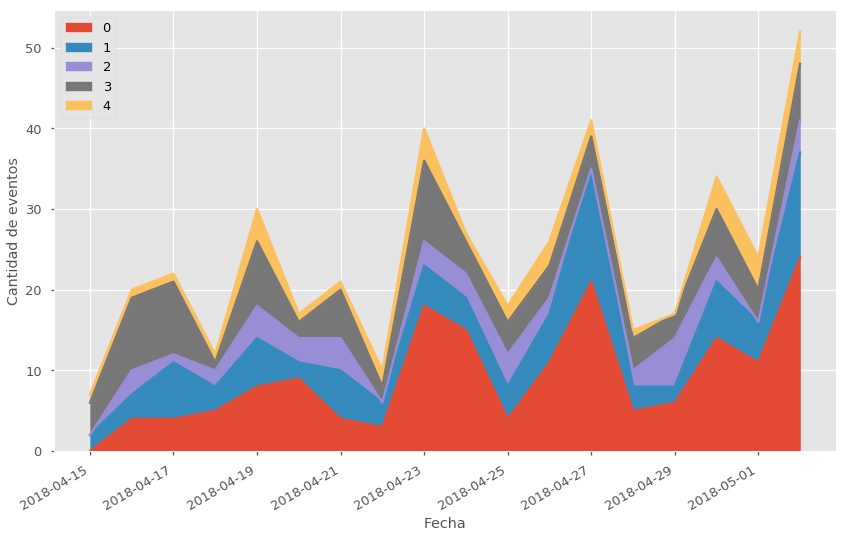

In [15]:
# plot data
fig, ax = plt.subplots(figsize=(14,9))
## puse 'browser' porque da igual por cual comprar
plot_data = reference_df.query(' device == "desktop" & site == "MLA" & screenName == "installments" ')


plot_data.groupby(['day','satisfactionLevel']).count()['browser'].unstack().fillna(0).plot.area(ax=ax)
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de eventos')
plt.legend(loc='upper left')
fig.autofmt_xdate() #plt.xticks(x, labels, rotation='vertical')
plt.show()

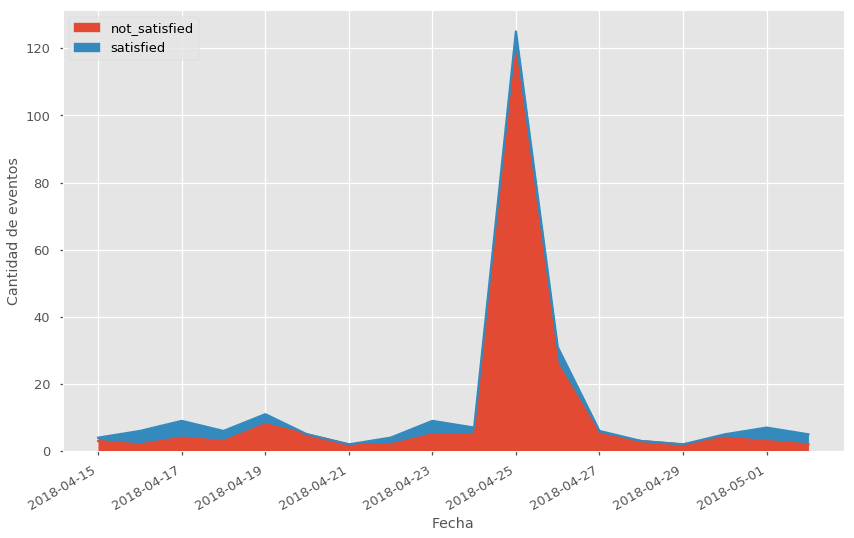

In [19]:
# plot data
fig, ax = plt.subplots(figsize=(14,9))

## puse 'browser' porque da igual por cual comprar
plot_data = reference_df.query(' device == "desktop" & site == "MLA" & screenName == "userIdentification" ')

plot_data.groupby(['day','satisfaction']).count()['browser'].unstack().fillna(0).plot.area(ax=ax)
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de eventos')
plt.legend(loc='upper left')
fig.autofmt_xdate() #plt.xticks(x, labels, rotation='vertical')
plt.show()

In [17]:
dfwords = reference_df.query(' device == "desktop" & site == "MLA" & screenName == "installments" ')
dfwords = dfwords.dropna(subset=['message'])
dfwords= dfwords.message + ' '
text = dfwords.sum()
#text # show data only for short periods

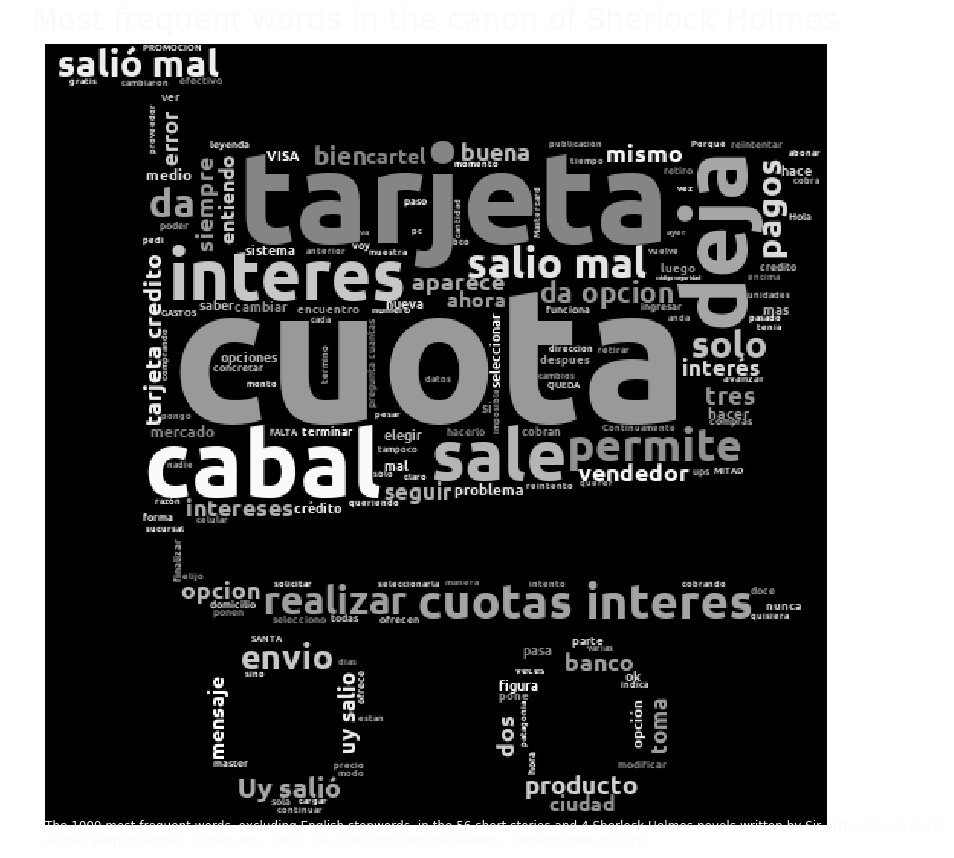

In [18]:
import random
#import helpers
import matplotlib as mpl
import matplotlib.pyplot as plt

# Used to download stopwords 
import nltk
#nltk.download('stopwords')

from nltk.corpus import stopwords
#from scipy.misc import imread
from imageio import imread
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from wordcloud import WordCloud, STOPWORDS
import re
import io

limit = 1000
infosize = 12

title = 'Most frequent words in the canon of Sherlock Holmes'
chartinfo = 'Author: Ramiro Gómez - ramiro.org • Data: The Complete Sherlock Holmes - sherlock-holm.es/ascii/'
footer = 'The {} most frequent words, excluding English stopwords, in the 56 short stories and 4 Sherlock Holmes novels written by Sir Arthur Conan Doyle.\n{}'.format(limit, chartinfo)
font = '/usr/share/fonts/truetype/ubuntu-font-family/Ubuntu-B.ttf'
fontcolor='#fafafa'
bgcolor = '#000000'
english_stopwords = set(stopwords.words('spanish')) | STOPWORDS | ENGLISH_STOP_WORDS
english_stopwords.add('quiero')
english_stopwords.add('puedo')
english_stopwords.add('pagina')
english_stopwords.add('compra')
english_stopwords.add('comprar')
english_stopwords.add('pago')
english_stopwords.add('pagar')
english_stopwords.add('dice')

def grey_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(50, 100)

wordcloud = WordCloud(
    max_words=limit,
    stopwords=english_stopwords,
    mask=imread('img/carrito.png'),
    background_color=bgcolor,
    font_path=font
).generate(text)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud.recolor(color_func=grey_color, random_state=3))
plt.title(title, color=fontcolor, size=30, y=1.01)
plt.annotate(footer, xy=(0, -.025), xycoords='axes fraction', fontsize=infosize, color=fontcolor)
plt.axis('off')
plt.show()
